In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as sts

from collections import Counter

sns.set(style="whitegrid")
sns.set_color_codes("pastel")

%matplotlib inline

Our data contains posts from 2 Reddit subreddits (Emacs and Vim) in a timeframe of 2 months (November to this moment).

In [16]:
emacs_df = pd.read_csv('./emacs_dataset.csv')
vim_df = pd.read_csv('./vim_dataset.csv')

In [17]:
emacs_df.head()

,ID,Author,Title,Count_of_Comments,Score,Upvote_Ratio,Flair,Date
0,kqsw1k,AutoModerator,Weekly tips/trick/etc/ thread,5,4,0.84,NaN,2021-01-05 18:00:15
1,kroev5,daviwil,Managing Multiple Email Accounts with mu4e - E...,1,12,1.00,NaN,2021-01-07 01:01:55
2,krptmz,geospeck,"Emacs: completion framework (Embark, Consult, ...",0,2,1.00,NaN,2021-01-07 02:17:55
3,krdwe8,arthurno1,Dired-auto-readme - Automatically display Read...,10,22,1.00,NaN,2021-01-06 13:13:22
4,kr02zr,nikivi,Reasons to Learn Emacs in 2021,21,161,0.97,NaN,2021-01-06 02:04:33


In [18]:
vim_df.head()

,ID,Author,Title,Count_of_Comments,Score,Upvote_Ratio,Flair,Date
0,bfxr2z,fuzzymidget,Vim theory and reflections,52,285,0.98,NaN,2019-04-22 15:06:14
1,kr7e49,Loolzy,Nobody understands my plate :(,27,450,0.94,NaN,2021-01-06 07:47:02
2,krizaj,nebulaeandstars,Finally switched to Android. First thing I did...,6,30,0.87,other,2021-01-06 18:26:21
3,krowvo,krehwell,anyone still remember the guy make a blog for ...,0,1,1.00,question,2021-01-07 01:29:54
4,krotbt,chooseausername2ok,How can I combine vimwiki and calendar.vim to ...,0,1,1.00,NaN,2021-01-07 01:24:15


# Let's make some feature visualization and see what we have

First of all, we already see that Emacs community is a little bit more active using Reddit platform than Vim community, since we have more posts in Emacs subreddit than Vim in a fixed timeframe.

In [19]:
print('There are %d posts in Emacs subreddit' % emacs_df['ID'].shape)
print('There are %d posts in Vim subreddit' % vim_df['ID'].shape)

There are 999 posts in Emacs subreddit
There are 700 posts in Vim subreddit


# Number of comments

Let's first look at the number of comments on posts in both subreddits. We will calculate the mean of both samples as well as upper and lower bounds.

In [22]:
emacs_df["Count_of_Comments"]

0       5
1       1
2       0
3      10
4      21
       ..
994     9
995    38
996     5
997     3
998    10
Name: Count_of_Comments, Length: 999, dtype: int64

In [23]:
vim_df["Count_of_Comments"]

0      52
1      27
2       6
3       0
4       0
       ..
695     0
696     5
697     2
698     8
699     2
Name: Count_of_Comments, Length: 700, dtype: int64

In [25]:
print("Mean number of comments for Emacs subreddit posts: %d" % np.mean(emacs_df["Count_of_Comments"]))
print("Mean number of comments for Vim subreddit posts: %d" % np.mean(vim_df["Count_of_Comments"]))

Mean number of comments for Emacs subreddit posts: 9
Mean number of comments for Vim subreddit posts: 14


In [26]:
print("Most commented post on Emacs subreddit has %d comments" % np.max(emacs_df["Count_of_Comments"]))
print("Most commented post on Vim subreddit has %d comments" % np.max(vim_df["Count_of_Comments"]))

Most commented post on Emacs subreddit has 157 comments
Most commented post on Vim subreddit has 236 comments


In [27]:
print("Least commented post on Emacs subreddit has %d comments" % np.min(emacs_df["Count_of_Comments"]))
print("Least commented post on Vim subreddit has %d comments" % np.min(vim_df["Count_of_Comments"]))

Least commented post on Emacs subreddit has 0 comments
Least commented post on Vim subreddit has 0 comments


It seems like people in Vim community communicate more actively in the comment sections of the posts. However, our data contains pinned post which by default has the most popular. Since we have it here, let's see how many posts have number of comments greater than average to get a better understanding.

In [29]:
emacs_df[emacs_df["Count_of_Comments"] > np.mean(emacs_df["Count_of_Comments"])]

,ID,Author,Title,Count_of_Comments,Score,Upvote_Ratio,Flair,Date
3,krdwe8,arthurno1,Dired-auto-readme - Automatically display Read...,10,22,1.00,NaN,2021-01-06 13:13:22
4,kr02zr,nikivi,Reasons to Learn Emacs in 2021,21,161,0.97,NaN,2021-01-06 02:04:33
9,krco6v,josejorgexl,The best sources to master Emacs,14,8,0.90,Question,2021-01-06 12:07:30
15,kqutap,RichieHHam,"Selectrum, Prescient, Consult, Embark - gettin...",85,20,1.00,NaN,2021-01-05 20:16:23
17,kr4egg,whism,Good emacs distro for an evil mode user?,14,3,0.67,NaN,2021-01-06 05:29:06
...,...,...,...,...,...,...,...,...
989,jm9n9p,jlla,Any online Emacs meetups anyone?..,11,32,0.98,NaN,2020-11-02 07:42:48
990,jm1nv6,nobiot,Org-transclusion (alpha v0.0.4) Demo #4,71,96,1.00,NaN,2020-11-01 23:46:25
992,jmfhws,vfclists,"Help needed with syntax of use ""apply"" function.",13,3,0.71,NaN,2020-11-02 13:41:14
995,jm3bgw,wasamasa,Any interest in a MELPA/Marmalade alternative?,38,11,0.80,NaN,2020-11-02 01:41:47


In [30]:
vim_df[vim_df["Count_of_Comments"] > np.mean(vim_df["Count_of_Comments"])]

,ID,Author,Title,Count_of_Comments,Score,Upvote_Ratio,Flair,Date
0,bfxr2z,fuzzymidget,Vim theory and reflections,52,285,0.98,NaN,2019-04-22 15:06:14
1,kr7e49,Loolzy,Nobody understands my plate :(,27,450,0.94,NaN,2021-01-06 07:47:02
5,kr3w8d,SamLovesNotion,How to make Vim status bar look like this?,32,31,0.78,question,2021-01-06 05:06:37
8,kqw8o4,Galeaf_13,Why do people say vim (nvim) is not a great IDE?,56,34,0.78,question,2021-01-05 21:59:26
15,kq0sbd,FechinLi,A quick reference was made for vim navigation,26,548,0.98,NaN,2021-01-04 15:04:51
...,...,...,...,...,...,...,...,...
676,jl46a5,someguy3,Why are the directions set as hjkl instead of ...,19,4,0.64,question,2020-10-31 07:07:29
677,jko7hq,mad_visionary,My Prettier plugin is setting huge horizontal ...,22,78,0.90,plugins & friends,2020-10-30 13:12:00
683,jk3nw1,ShivamJoker,Wait for it !!! This is what we can do with vi...,74,201,0.95,NaN,2020-10-29 15:32:08
689,jjv42n,punctualjohn,Vim is the gateway drug to Linux,68,132,0.95,other,2020-10-29 06:58:28


In [33]:
print("%d percent of posts in Emacs subreddit have greater than average number of comments" % (315 / 999 * 100))
print("%d percent of posts in Vim subreddit have greater than average number of comments" % (179 / 700 * 100))

31 percent of posts in Emacs subreddit have greater than average number of comments
25 percent of posts in Vim subreddit have greater than average number of comments


As we see here, almost one third of all Emacs posts have greater than average number of comments comparing to one fourth on Vim subreddit.

Finally, let's see the distribution of comments in both subreddits.

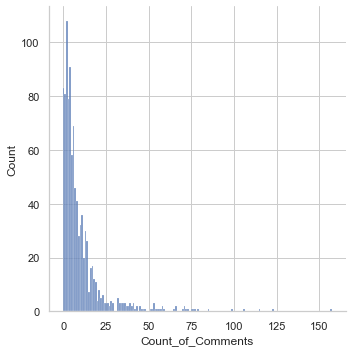

In [34]:
sns.displot(emacs_df, x="Count_of_Comments", discrete=True)

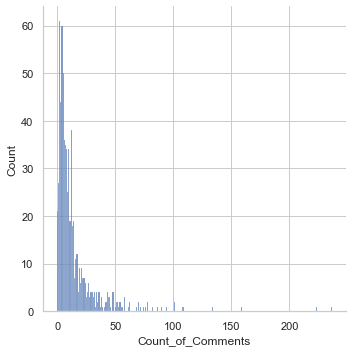

In [35]:
sns.displot(vim_df, x="Count_of_Comments", discrete=True)

The overall distribution is pretty similar as expected.

# Score (number of upvotes)

Let's make similar things like we did in the previous section.

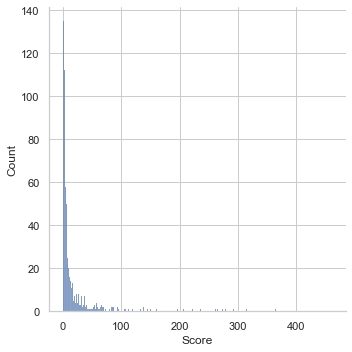

In [36]:
sns.displot(emacs_df, x="Score", discrete=True)

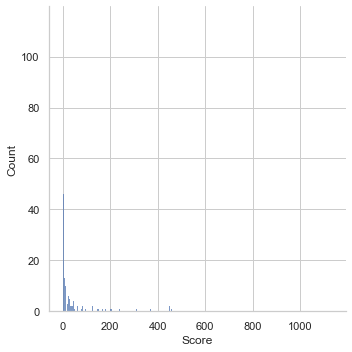

In [39]:
sns.displot(vim_df, x="Score", discrete=True)

Again, the same situation with pinned post. However, we will manage it further.

In [40]:
print("Mean number of upvotes for Emacs subreddit posts: %d" % np.mean(emacs_df["Score"]))
print("Mean number of upvotes for Vim subreddit posts: %d" % np.mean(vim_df["Score"]))

Mean number of upvotes for Emacs subreddit posts: 18
Mean number of upvotes for Vim subreddit posts: 30


In [42]:
print("Most upvoted post on Emacs subreddit has %d upvotes" % np.max(emacs_df["Score"]))
print("Most upvoted post on Vim subreddit has %d upvotes" % np.max(vim_df["Score"]))

Most upvoted post on Emacs subreddit has 461 upvotes
Most upvoted post on Vim subreddit has 1134 upvotes


In [43]:
emacs_df[emacs_df["Score"] > np.mean(emacs_df["Score"])]

,ID,Author,Title,Count_of_Comments,Score,Upvote_Ratio,Flair,Date
3,krdwe8,arthurno1,Dired-auto-readme - Automatically display Read...,10,22,1.00,NaN,2021-01-06 13:13:22
4,kr02zr,nikivi,Reasons to Learn Emacs in 2021,21,161,0.97,NaN,2021-01-06 02:04:33
7,kr5vj1,emoarmy,[ANN] elegant-agenda-mode landed on MELPA,3,26,0.97,NaN,2021-01-06 06:37:31
8,kr5bj9,ericdallo,[Tutorial] Configuring Emacs as a Clojure IDE ...,3,26,1.00,News,2021-01-06 06:11:23
15,kqutap,RichieHHam,"Selectrum, Prescient, Consult, Embark - gettin...",85,20,1.00,NaN,2021-01-05 20:16:23
...,...,...,...,...,...,...,...,...
973,jmpsdl,__-----_-----__,Continuous Professional Development Record in ...,10,54,1.00,emacs-fu,2020-11-03 02:44:03
984,jmhhce,im_not_juicing,Suggestions to run a business with Emacs?,26,24,0.87,NaN,2020-11-02 16:01:33
989,jm9n9p,jlla,Any online Emacs meetups anyone?..,11,32,0.98,NaN,2020-11-02 07:42:48
990,jm1nv6,nobiot,Org-transclusion (alpha v0.0.4) Demo #4,71,96,1.00,NaN,2020-11-01 23:46:25


In [44]:
vim_df[vim_df["Score"] > np.mean(vim_df["Score"])]

,ID,Author,Title,Count_of_Comments,Score,Upvote_Ratio,Flair,Date
0,bfxr2z,fuzzymidget,Vim theory and reflections,52,285,0.98,NaN,2019-04-22 15:06:14
1,kr7e49,Loolzy,Nobody understands my plate :(,27,450,0.94,NaN,2021-01-06 07:47:02
5,kr3w8d,SamLovesNotion,How to make Vim status bar look like this?,32,31,0.78,question,2021-01-06 05:06:37
8,kqw8o4,Galeaf_13,Why do people say vim (nvim) is not a great IDE?,56,34,0.78,question,2021-01-05 21:59:26
9,kqs3vi,prabirshrestha,vim-lsp 2021 (poll),3,49,0.90,NaN,2021-01-05 17:06:06
...,...,...,...,...,...,...,...,...
680,jkbop3,a_bored_husky,Mario on Vim,9,115,0.98,NaN,2020-10-30 02:04:58
682,jkh6iq,phelipetls,Python f-strings syntax highlighting in Vim,4,31,0.96,NaN,2020-10-30 06:46:09
683,jk3nw1,ShivamJoker,Wait for it !!! This is what we can do with vi...,74,201,0.95,NaN,2020-10-29 15:32:08
689,jjv42n,punctualjohn,Vim is the gateway drug to Linux,68,132,0.95,other,2020-10-29 06:58:28


In [45]:
print("%d percent of posts in Emacs subreddit have greater than average number of upvotes" % (215 / 999 * 100))
print("%d percent of posts in Vim subreddit have greater than average number of upvotes" % (121 / 700 * 100))

21 percent of posts in Emacs subreddit have greater than average number of comments
17 percent of posts in Vim subreddit have greater than average number of comments


We see pretty much the same situation with scores of the posts. On average, Emacs community upvotes and comment posts more actively. However, Vim's pinned post far more popular than all other Emacs posts.

From the distribution plots we see that in Emacs community people upvote more often than in Vim's one.

# Upvote ratio (The percentage of upvotes from all votes on the submission)

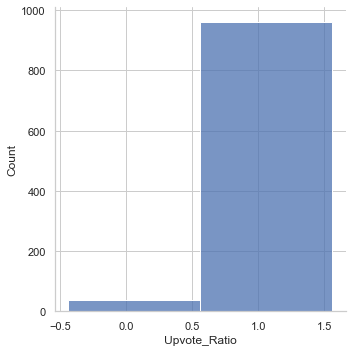

In [47]:
sns.displot(emacs_df, x="Upvote_Ratio", discrete=True)

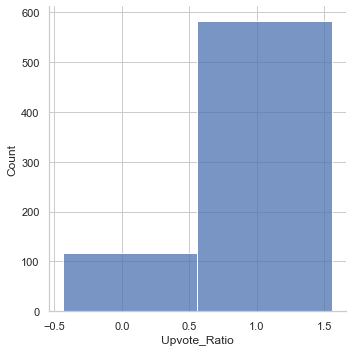

In [48]:
sns.displot(vim_df, x="Upvote_Ratio", discrete=True)

Let's choose a threshold of 0.9 of the upvote ratio to see how many posts have a majority of upvotes.

In [52]:
emacs_df[emacs_df["Upvote_Ratio"] > 0.9]

,ID,Author,Title,Count_of_Comments,Score,Upvote_Ratio,Flair,Date
1,kroev5,daviwil,Managing Multiple Email Accounts with mu4e - E...,1,12,1.00,NaN,2021-01-07 01:01:55
2,krptmz,geospeck,"Emacs: completion framework (Embark, Consult, ...",0,2,1.00,NaN,2021-01-07 02:17:55
3,krdwe8,arthurno1,Dired-auto-readme - Automatically display Read...,10,22,1.00,NaN,2021-01-06 13:13:22
4,kr02zr,nikivi,Reasons to Learn Emacs in 2021,21,161,0.97,NaN,2021-01-06 02:04:33
5,krp6o6,woozong,Question: hilight date in date-picker (org-age...,0,2,1.00,Question,2021-01-07 01:44:47
...,...,...,...,...,...,...,...,...
993,jm4e0k,Lazy-Snail,RTFM quest or the Info files like it was suppo...,3,17,1.00,NaN,2020-11-02 02:48:24
994,jm3ey2,1419538,4K scaling on Linux,9,18,0.96,NaN,2020-11-02 01:48:30
996,jm2ngs,takeonrules,Help with code completion for writing elisp?,5,8,1.00,NaN,2020-11-02 00:59:36
997,jm5fff,S1rPrise,Recompile in comint mode,3,3,1.00,NaN,2020-11-02 03:49:03


In [53]:
vim_df[vim_df["Upvote_Ratio"] > 0.9]

,ID,Author,Title,Count_of_Comments,Score,Upvote_Ratio,Flair,Date
0,bfxr2z,fuzzymidget,Vim theory and reflections,52,285,0.98,NaN,2019-04-22 15:06:14
1,kr7e49,Loolzy,Nobody understands my plate :(,27,450,0.94,NaN,2021-01-06 07:47:02
3,krowvo,krehwell,anyone still remember the guy make a blog for ...,0,1,1.00,question,2021-01-07 01:29:54
4,krotbt,chooseausername2ok,How can I combine vimwiki and calendar.vim to ...,0,1,1.00,NaN,2021-01-07 01:24:15
6,krl1ql,aramayis_,How I can avoid from ^M ?,5,1,1.00,NaN,2021-01-06 21:06:46
...,...,...,...,...,...,...,...,...
693,jjns01,ledesmablt,"vim-run: Run, view, and manage UNIX shell comm...",29,195,0.97,plugins & friends,2020-10-29 00:31:41
694,jk2k14,coralton,Gary Bernhardt’s new YouTube channel,11,13,1.00,NaN,2020-10-29 14:11:58
695,jk843u,SuperGrip,UltiSnips python code formatting ?,0,2,1.00,NaN,2020-10-29 22:14:52
697,jk5xwi,bocadillo_sin_pan,How do i install vimball?,2,2,1.00,NaN,2020-10-29 18:54:53


In [54]:
print("%d percent of posts in Emacs subreddit have upvote ration > 0.9" % (713 / 999 * 100))
print("%d percent of posts in Vim subreddit have upvote ratio > 0.9" % (331 / 700 * 100))

71 percent of posts in Emacs subreddit have upvote ration > 0.9
47 percent of posts in Vim subreddit have upvote ratio > 0.9


Whether from this data or from the distribution plots it is clear that Emacs community users use the upvote button more frequently.

# Flair

Flair is used as a tagging system for posts as well as individual users, and it can be used to filter content, unique identifiers, and resources.

So, we will see how many posts in each subreddit have flair. It would mean that users sort and save posts by their interests and purposes.

In [57]:
emacs_df[emacs_df["Flair"] == emacs_df["Flair"]]

,ID,Author,Title,Count_of_Comments,Score,Upvote_Ratio,Flair,Date
5,krp6o6,woozong,Question: hilight date in date-picker (org-age...,0,2,1.0,Question,2021-01-07 01:44:47
8,kr5bj9,ericdallo,[Tutorial] Configuring Emacs as a Clojure IDE ...,3,26,1.0,News,2021-01-06 06:11:23
9,krco6v,josejorgexl,The best sources to master Emacs,14,8,0.9,Question,2021-01-06 12:07:30
18,kr6kyb,RealFenlair,Buffer Region Change History,3,3,1.0,Question,2021-01-06 07:09:54
23,kr5kvi,0xMii,Strange neon green colour in some company tool...,0,1,1.0,Question,2021-01-06 06:23:46
...,...,...,...,...,...,...,...,...
957,jo4i7i,doctordesh,[Help] Differences between terminal emacs and ...,11,1,1.0,Question,2020-11-05 07:39:57
973,jmpsdl,__-----_-----__,Continuous Professional Development Record in ...,10,54,1.0,emacs-fu,2020-11-03 02:44:03
976,jmvzhs,trimorphic,Has anything of substance ever been done in el...,8,12,1.0,Question,2020-11-03 07:56:06
981,jmwbsm,graduale,Hide from the agenda only tasks with children ...,5,3,1.0,Question,2020-11-03 08:12:23


In [58]:
vim_df[vim_df["Flair"] == vim_df["Flair"]]

,ID,Author,Title,Count_of_Comments,Score,Upvote_Ratio,Flair,Date
2,krizaj,nebulaeandstars,Finally switched to Android. First thing I did...,6,30,0.87,other,2021-01-06 18:26:21
3,krowvo,krehwell,anyone still remember the guy make a blog for ...,0,1,1.00,question,2021-01-07 01:29:54
5,kr3w8d,SamLovesNotion,How to make Vim status bar look like this?,32,31,0.78,question,2021-01-06 05:06:37
8,kqw8o4,Galeaf_13,Why do people say vim (nvim) is not a great IDE?,56,34,0.78,question,2021-01-05 21:59:26
11,kr9rnu,animalCollectiveSoul,How to jump to matching angle-bracket < > using %,2,2,1.00,question,2021-01-06 09:41:01
...,...,...,...,...,...,...,...,...
689,jjv42n,punctualjohn,Vim is the gateway drug to Linux,68,132,0.95,other,2020-10-29 06:58:28
690,jkbgz1,leaderwho,Show actions you're typing in normal mode in t...,5,4,1.00,question,2020-10-30 01:53:20
693,jjns01,ledesmablt,"vim-run: Run, view, and manage UNIX shell comm...",29,195,0.97,plugins & friends,2020-10-29 00:31:41
696,jkb404,mrillusi0n,Is there a way to make cib work on the nearest...,5,1,0.67,question,2020-10-30 01:33:03


In [59]:
print("%d percent of posts in Emacs subreddit have flair" % (265 / 999 * 100))
print("%d percent of posts in Vim subreddit have flair" % (238 / 700 * 100))

26 percent of posts in Emacs subreddit have flair
34 percent of posts in Vim subreddit have flair


As wee see greater percentage of Vim posts have flair, especially tagged "question", which signals that people are seeking for help there more often than in Emacs community.

To conlcude, we can say that there's no a big difference between the activity in these to subreddits, but to be more precise we should mention that Emacs community is evolving a little bit faster and more actively.